# Lipid analysis

## Lindemann index

In [1]:
import numpy as np
import MDAnalysis as mda 
import matplotlib.pyplot as plt 
import seaborn as sns
from MDAnalysis.analysis import distances

In [2]:
u = mda.Universe('sa.gro','nojump.xtc')

In [4]:
traj_mol_li = []
for time in range(0,21,20):    
    mol_li = []
    selections = ['resname TZP']
    for s in selections:
        block = []
        for ts in u.trajectory[time:time+20]:
            a = u.select_atoms(s)
            distance_array = []
            for i in a.residues:
                distance_array.append(distances.self_distance_array(i.atoms.positions))
            block.append(distance_array)
        block = np.array(block)
        block_sq = block**2
        mol_li.append((((block_sq.mean(axis=0) - block.mean(axis=0)**2)**0.5)/block.mean(axis=0)).mean(axis=1))
    traj_mol_li.append(mol_li)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (20, 1153) + inhomogeneous part.

In [50]:
traj_mol_li = []
for time in range(0,21,20):    
    mol_li = []
    selections = ['resname TZP']
    for s in selections:
        block = []
        for ts in u.trajectory[time:time+20]:
            a = u.select_atoms(s)
            positions = []
            for i in a.residues:
                positions.append(i.atoms.positions)

In [79]:
traj_mol_li = []
for time in range(0,3200,20):    
    mol_li = []
    selections = ['resname TZP']
    for s in selections:
        block = []
        for ts in u.trajectory[time:time+20]:
            a = u.select_atoms(s)
            positions = []
            for i in a.residues:
                positions.append(i.atoms.positions)
            reshaped = np.concatenate(positions).reshape(-1, 28, 3)
            distance_array = []
            for arr in reshaped:
                distance_array.append(distances.self_distance_array(arr))
            block.append(distance_array)
        block = np.array(block)
        block_sq = block**2
        mol_li.append((((block_sq.mean(axis=0) - block.mean(axis=0)**2)**0.5)/block.mean(axis=0)).mean(axis=1))
    traj_mol_li.append(mol_li)

In [81]:
formulation_li = []
for i in traj_mol_li:
    formulation_li.append(np.concatenate(i).mean())

In [82]:
np.save('tzp_li.npy',formulation_li)

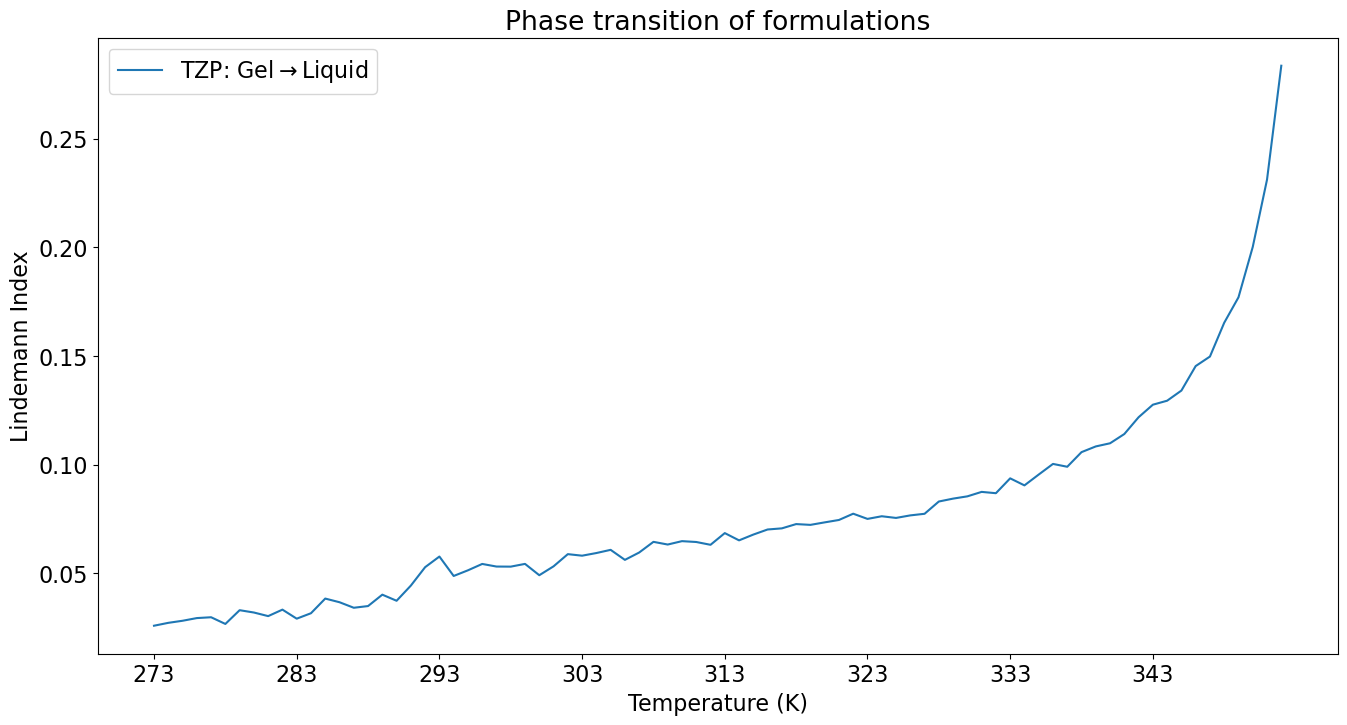

In [83]:
plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = 16
plt.plot(formulation_li[80:0:-1], label=r'TZP: Gel$\to$Liquid')
#plt.plot(formulation_li[80:], label=r'DSPC: Liquid$\to$Gel')
plt.xlabel('Temperature (K)')
plt.ylabel('Lindemann Index')
plt.xticks(range(0,80,10),[str(i) for i in range(273,353,10)])
plt.title('Phase transition of formulations')
plt.legend()